# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [145]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [146]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Физик-ядерщик",
    'area': 1,
    'page': 0,
    'per_page': 10
}

data = requests.get(URL, params).json()

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [147]:
data.keys()

dict_keys(['items', 'found', 'pages', 'page', 'per_page', 'clusters', 'arguments', 'fixes', 'suggests', 'alternate_url'])

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [148]:
# your code here

(1 балл) Посчитайте сколько всего найдено вакансий:

In [149]:
# your code here

(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [150]:
class Company:
  pass
    # your code here

(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [151]:
# your code here

(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [152]:
# your code here

(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [153]:
# your code here

(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

In [154]:
# your code here

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве):

In [155]:
# your code here

(2 балла) **Сделайте выводы о проделанной работе:**

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

Ваши выводы здесь :)

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [156]:
!gdown 10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8

Downloading...
From: https://drive.google.com/uc?id=10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 186MB/s]


Создадим DataFrame:

In [157]:
import pandas as pd

diamonds = pd.read_csv("diamonds.csv")
diamonds

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,...,8.66,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,...,5.71,TK,XTK,unknown,NaN,Green,unknown,NaN,Fancy Light,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,...,10.20,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,...,3.47,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy,1350000


(0.5 балла) Выведете первые 5 строк датасета:

In [158]:
print(diamonds.head(5))

   Unnamed: 0    cut color clarity  carat_weight cut_quality  lab   symmetry  \
0           0  Round     E    VVS2          0.09   Excellent  IGI  Very Good   
1           1  Round     E    VVS2          0.09   Very Good  IGI  Very Good   
2           2  Round     E    VVS2          0.09   Excellent  IGI  Very Good   
3           3  Round     E    VVS2          0.09   Excellent  IGI  Very Good   
4           4  Round     E    VVS2          0.09   Very Good  IGI  Very Good   

      polish eye_clean  ... meas_depth girdle_min  girdle_max  fluor_color  \
0  Very Good   unknown  ...       1.79          M           M      unknown   
1  Very Good   unknown  ...       1.78        STK         STK      unknown   
2  Very Good   unknown  ...       1.77         TN           M      unknown   
3  Very Good   unknown  ...       1.78          M         STK      unknown   
4  Excellent   unknown  ...       1.82        STK         STK      unknown   

   fluor_intensity  fancy_color_dominant_color  fa

(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [159]:
print(len(diamonds))

219703


(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [160]:
print(diamonds['total_sales_price'].idxmax(), '-', diamonds['total_sales_price'].max())
print(diamonds['total_sales_price'].idxmin(), '-', diamonds['total_sales_price'].min())

219702 - 1449881
0 - 200


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [161]:
diamonds = diamonds.replace(to_replace='unknown', value=np.nan)
diamonds = diamonds.fillna(value=np.nan)
print(diamonds.isna().sum().sum())

1891168


(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [162]:
sum_isna = diamonds.isna().sum()
for name in diamonds.columns:
  if sum_isna[name]:
    print(name)

color
cut_quality
eye_clean
culet_size
culet_condition
girdle_min
girdle_max
fluor_color
fluor_intensity
fancy_color_dominant_color
fancy_color_secondary_color
fancy_color_overtone
fancy_color_intensity


В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными.

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [163]:
bad_columns = list(filter(lambda l: l.startswith('fancy_color_') or l.startswith('fluor_'), diamonds.columns))
print(len(bad_columns))

6


2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках:

In [168]:
for col in bad_columns:
  print(col, end=":    ")
  print(diamonds[col].notna().sum())

fluor_color:    15726
fluor_intensity:    76084
fancy_color_dominant_color:    9164
fancy_color_secondary_color:    1062
fancy_color_overtone:    388
fancy_color_intensity:    9162


3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [169]:
diamonds.drop(bad_columns, axis=1, inplace=True)
print(diamonds.head())

   Unnamed: 0    cut color clarity  carat_weight cut_quality  lab   symmetry  \
0           0  Round     E    VVS2          0.09   Excellent  IGI  Very Good   
1           1  Round     E    VVS2          0.09   Very Good  IGI  Very Good   
2           2  Round     E    VVS2          0.09   Excellent  IGI  Very Good   
3           3  Round     E    VVS2          0.09   Excellent  IGI  Very Good   
4           4  Round     E    VVS2          0.09   Very Good  IGI  Very Good   

      polish eye_clean culet_size culet_condition  depth_percent  \
0  Very Good       NaN          N             NaN           62.7   
1  Very Good       NaN          N             NaN           61.9   
2  Very Good       NaN        NaN             NaN           61.1   
3  Very Good       NaN        NaN             NaN           62.0   
4  Excellent       NaN          N             NaN           64.9   

   table_percent  meas_length  meas_width  meas_depth girdle_min girdle_max  \
0           59.0         2.85  

(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [170]:
bad_columns = list(filter(lambda l: l.startswith('culet_'), diamonds.columns))
print(len(bad_columns))

for col in bad_columns:
  print(col, end=":    ")
  print(diamonds[col].notna().sum())

diamonds.drop(bad_columns, axis=1, inplace=True)
print(diamonds.head())

2
culet_size:    133963
culet_condition:    15319
   Unnamed: 0    cut color clarity  carat_weight cut_quality  lab   symmetry  \
0           0  Round     E    VVS2          0.09   Excellent  IGI  Very Good   
1           1  Round     E    VVS2          0.09   Very Good  IGI  Very Good   
2           2  Round     E    VVS2          0.09   Excellent  IGI  Very Good   
3           3  Round     E    VVS2          0.09   Excellent  IGI  Very Good   
4           4  Round     E    VVS2          0.09   Very Good  IGI  Very Good   

      polish eye_clean  depth_percent  table_percent  meas_length  meas_width  \
0  Very Good       NaN           62.7           59.0         2.85        2.87   
1  Very Good       NaN           61.9           59.0         2.84        2.89   
2  Very Good       NaN           61.1           59.0         2.88        2.90   
3  Very Good       NaN           62.0           59.0         2.86        2.88   
4  Excellent       NaN           64.9           58.5         2.7

(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [171]:
print(diamonds['total_sales_price'].sum())

1517721991


Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [172]:
print(diamonds.loc[::2])

        Unnamed: 0    cut color clarity  carat_weight cut_quality  lab  \
0                0  Round     E    VVS2          0.09   Excellent  IGI   
2                2  Round     E    VVS2          0.09   Excellent  IGI   
4                4  Round     E    VVS2          0.09   Very Good  IGI   
6                6  Round     E    VVS2          0.09   Very Good  IGI   
8                8  Round     E    VVS2          0.09   Very Good  IGI   
...            ...    ...   ...     ...           ...         ...  ...   
219694      219695  Round     D      IF         12.52   Excellent  HRD   
219696      219697   Oval     H     VS2         18.88         NaN  GIA   
219698      219699  Round     E     VS1         10.65   Excellent  GIA   
219700      219701  Round     E     VS1         18.07   Excellent  GIA   
219702      219703   Pear   NaN    VVS2         10.03         NaN  GIA   

         symmetry     polish eye_clean  depth_percent  table_percent  \
0       Very Good  Very Good       NaN 

(0.5 балла) А теперь с индексами, кратными 6:

In [173]:
print(diamonds.loc[::6])

        Unnamed: 0      cut color clarity  carat_weight cut_quality  lab  \
0                0    Round     E    VVS2          0.09   Excellent  IGI   
6                6    Round     E    VVS2          0.09   Very Good  IGI   
12              12    Round     E    VVS2          0.09   Very Good  IGI   
18              18    Round     E    VVS2          0.09   Excellent  IGI   
24              24    Round     L      I1          0.34   Excellent  IGI   
...            ...      ...   ...     ...           ...         ...  ...   
219678      219679    Round     G     VS1         10.23   Excellent  GIA   
219684      219685  Radiant   NaN      I1          0.89         NaN  GIA   
219690      219691    Round     D    VVS2         10.10   Excellent  GIA   
219696      219697     Oval     H     VS2         18.88         NaN  GIA   
219702      219703     Pear   NaN    VVS2         10.03         NaN  GIA   

         symmetry     polish eye_clean  depth_percent  table_percent  \
0       Very Go

(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [174]:
cat_feature = ['cut', 'color', 'clarity', 'cut_quality', 'lab', 'symmetry', 'polish', 'eye_clean', 'girdle_min', 'girdle_max']
print(diamonds[cat_feature])

             cut color clarity cut_quality  lab   symmetry     polish  \
0          Round     E    VVS2   Excellent  IGI  Very Good  Very Good   
1          Round     E    VVS2   Very Good  IGI  Very Good  Very Good   
2          Round     E    VVS2   Excellent  IGI  Very Good  Very Good   
3          Round     E    VVS2   Excellent  IGI  Very Good  Very Good   
4          Round     E    VVS2   Very Good  IGI  Very Good  Excellent   
...          ...   ...     ...         ...  ...        ...        ...   
219698     Round     E     VS1   Excellent  GIA  Excellent  Excellent   
219699   Radiant   NaN     VS2         NaN  GIA  Very Good  Very Good   
219700     Round     E     VS1   Excellent  GIA  Excellent  Excellent   
219701  Princess   NaN     SI2         NaN  GIA       Good       Good   
219702      Pear   NaN    VVS2         NaN  GIA  Very Good  Excellent   

       eye_clean girdle_min girdle_max  
0            NaN          M          M  
1            NaN        STK        STK  


>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [ ]:
# your code here

### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


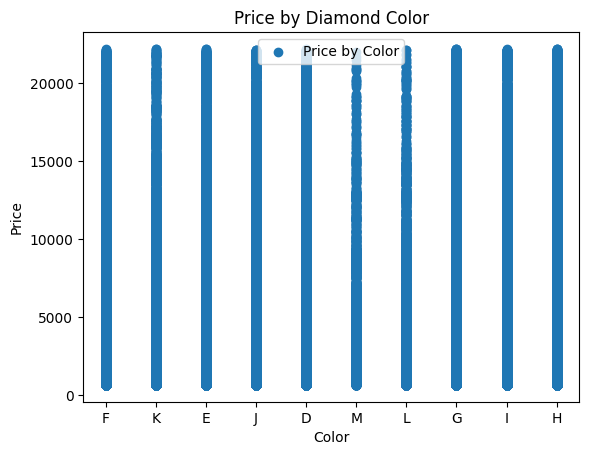

In [192]:
import matplotlib.pyplot as plt

clear_copy = diamonds[diamonds['color'].notna()]
q5 = clear_copy['total_sales_price'].quantile(0.05)
q95 = clear_copy['total_sales_price'].quantile(0.95)
clear_copy = clear_copy[(clear_copy['total_sales_price'] > q5) & (clear_copy['total_sales_price'] < q95)]

plt.scatter(clear_copy['color'], clear_copy['total_sales_price'], label='Price by Color')
plt.title('Price by Diamond Color')
plt.xlabel('Color')
plt.ylabel('Price')
plt.legend()

(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

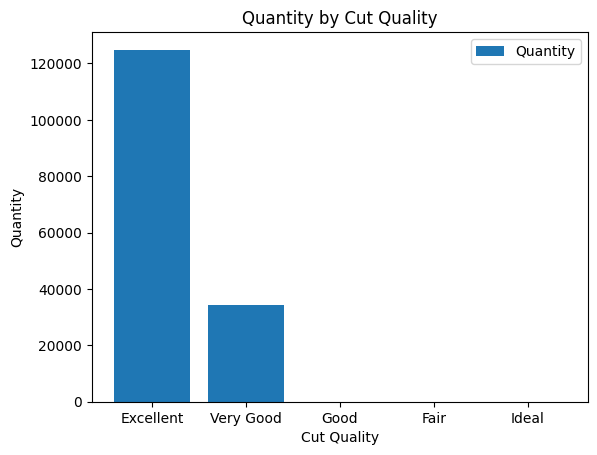

In [197]:
clear_copy = diamonds[diamonds['cut_quality'].notna()]
quality_to_count = clear_copy['cut_quality'].value_counts().reset_index()

plt.bar(quality_to_count['cut_quality'], quality_to_count['count'], label='Quantity')
plt.title('Quantity by Cut Quality')
plt.xlabel('Cut Quality')
plt.ylabel('Quantity')
plt.legend()

# plt.scatter(clear_copy['color'], clear_copy['total_sales_price'], label='Price by Color')
# plt.title('Price by Diamond Color')
# plt.xlabel('Color')
# plt.ylabel('Price')
# plt.legend()

(2 балла) Постройте график `вес бриллианта - стоимость`:

In [ ]:
# your code here

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

In [ ]:
# your code here

(2 балла) **Сделайте выводы по построенным графикам:**

>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*

Ваши выводы здесь :)

## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно:
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк:

In [ ]:
# your code here

(1 балл) Перемешайте строки в датафрейме случайным образом:

In [ ]:
# your code here

(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [ ]:
# your code here

(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`:

In [ ]:
# your code here

(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [ ]:
# your code here

(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

In [ ]:
# your code here

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

In [ ]:
# your code here

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [ ]:
# your code here

(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [ ]:
# your code here

**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [ ]:
# your code here

(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [ ]:
# your code here

(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [ ]:
# your code here

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [ ]:
# your code here

(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

Ваши выводы здесь :)